# Project: Wrangling and Analyze Data

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import warnings
import seaborn as sns
import re
import datetime
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams['savefig.dpi'] = 300
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


## Data Gathering


In [2]:
df_Twitter_Data = pd.read_csv('twitter-archive-enhanced.csv')
df_Twitter_Data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [4]:
Text_List = []
with open('tweet-json.txt') as file:
    for line in file:
        Text_List.append(json.loads(line))

# Convert the list into a dataframe
tweet_engagement = pd.DataFrame(Text_List, columns = ['id', 'retweet_count', 'favorite_count'])
# Rename 'id' column to 'tweet_id' so that we can merge this dataframe with other dataframes.
tweet_engagement = tweet_engagement.rename(columns = {'id':'tweet_id'})

tweet_engagement.sample(5)

,tweet_id,retweet_count,favorite_count
1944,673705679337693185,439,1337
96,873337748698140672,1667,0
617,796177847564038144,16628,0
1477,693582294167244802,292,1802
1957,673576835670777856,613,1482


Since all three dataframes have tweet_id column in common, then, we can join them into a single dataframe later.

## Assessing Data


In [5]:
df_Twitter_Data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_Twitter_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The data type of the columns 'tweet_id' and 'timestamp' is inappropriate. The column 'tweet_id' is nominal data, therefore, it has to be converted into 'string' datatype. Also, 'timestamp' shall be converted to 'datetime' datatype, and need to be cleaned from unnecessary details. Furthermore, the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' are useless because they contain so many missing values. Hence, these columns are going to be dropped in the data cleaning part. In addition to that, there is a tidiness issue where there are four columns for dog stages, which are: 'doggo', 'floofer', 'pupper', and 'puppo'. This issue is going to be solved later by combining these columns.

In [7]:
df_Twitter_Data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


We notice that there are strange things in the numerator and denominator of the ratings. Starting with the denominator, we know that all ratings are out of 10. However, it can be observed that the minimum denominator is 0 and the maximum is 170. In addition to that, we know that the numerator is always higher than 10, e.g., 12 or 13. However, the minimum is less than 10, i.e., 0, and the maximum is 1776, which is too high. Therefore, further investigation is needed regarding these anomalies. 

In [8]:
df_Twitter_Data['source'].values

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

The 'source' column can be cleaned and simplified by extracting the source from the HTML structure.

In [9]:
# Count the number of tweets with numerator less than 10
Count_Anam_num = df_Twitter_Data[df_Twitter_Data['rating_numerator'] < 10].count().max()
Count_Anam_num

440

In [10]:
# Count the number of tweets with denominator that is not equal to 10
Count_Anam_den = df_Twitter_Data[df_Twitter_Data['rating_denominator'] != 10].count().max()
Count_Anam_den

23

In [11]:
# View sample of tweets with anamolous numerator
df_Twitter_Data[df_Twitter_Data['rating_numerator'] < 10].text.sample(5).values

array(['This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK',
       "This is Bode. He's a heavy sleeper. 9/10 https://t.co/YMkxhGWUqv",
       "Meet Penelope. She's a bacon frise. Total babe (lol get it like the movie). Doesn't bark tho. 5/10 very average dog https://t.co/SDcQYg0HSZ",
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       "Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg"],
      dtype=object)

In [12]:
# View samples of tweets with anamolous denominator
df_Twitter_Data[df_Twitter_Data['rating_denominator'] != 10].text.sample(5).values

array(["I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",
       'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"],
      dtype=object)

In [13]:
# View the extracted names of the dogs

df_Twitter_Data['name'].value_counts().head(15)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Name: name, dtype: int64

It is obvious that there is something wrong with the names column. Some names have 'none' values, i.e., names were not extracted at all. Some names have inappropriate values, e.g., 'a' and 'the'.

In [14]:
# View information about images dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The images data frame contains only 2075 entries, while 'df_Twitter_Data' data frame contains 2355, which means that there are about 280 tweets without images. These tweets will be dropped from the dataset later.

In [15]:
# View information about tweet_engagement dataframe

tweet_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


There is no null values in the dataframe

In [16]:
# View descriptive statistics about tweet_engagement dataframe

tweet_engagement.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

1.	Dataset contains duplicated tweets, or retweets.
2.	Dataset contains useless columns.
3.	The column ‘source’ is not readable.
4.	The column 'tweet_id' has inappropriate datatype.
5.	The column 'timestamp' has inappropriate datatype and unnecessary details.
6.	There are errors in data extraction and improper values in the data.
7.	The dataset contains tweets missing images.
8.	Wrong datatype for categorical columns.


### Tidiness issues
1. Dataset is separated into three datasets.

2. Dataset contains four columns for dog stages.

## Cleaning Data


In [17]:
# Make copies of original pieces of data

df_Twitter_Data_Copy = df_Twitter_Data.copy()
df_image_predictions_Copy = image_predictions.copy()
df_tweet_engagement_Copy = tweet_engagement.copy()

### Issue #1: Dataset is separated into three datasets (Tidiness Issue)

#### Define

Merge the three data frames into a single data frame based on the ‘tweet_id’ column.

#### Code

In [18]:
# Merge the three dataframes into a single dataframe
df_merged = df_Twitter_Data_Copy
df_merged = df_merged.set_index("tweet_id").join(df_image_predictions_Copy.set_index("tweet_id"), on = "tweet_id")
df_merged = df_merged.join(df_tweet_engagement_Copy.set_index("tweet_id"), on = "tweet_id")
df_merged = df_merged.reset_index()

#### Test

In [19]:
df_merged.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [20]:
print(df_Twitter_Data_Copy.shape)
print(df_image_predictions_Copy.shape)
print(df_tweet_engagement_Copy.shape)
print(df_merged.shape)
print(df_Twitter_Data_Copy.shape[1] + df_image_predictions_Copy.shape[1] + df_tweet_engagement_Copy.shape[1])
print(df_merged.shape[1])

(2356, 17)
(2075, 12)
(2354, 3)
(2356, 30)
32
30


In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The datasets have been merged succesfully.

### Issue #2: Dataset contains four columns for dog stages (Tidiness Issue)

#### Define

Combine the four columns 'doggo', 'floofer', 'pupper', and 'puppo' into a single column.

#### Code

In [22]:
# Explore the columns
print(df_merged.doggo.unique())
print(df_merged.floofer.unique())
print(df_merged.pupper.unique())
print(df_merged.puppo.unique())

df_merged[['doggo', 'floofer', 'pupper', 'puppo']].isna().sum()

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

In [23]:
df_merged['dog_stage'] = df_merged['doggo'] + df_merged['floofer'] + df_merged['pupper'] + df_merged['puppo']
df_merged['dog_stage'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [24]:
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['NoneNoneNoneNone'], 'None')
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['doggoNoneNoneNone'], 'doggo')
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['NoneNoneNonepuppo'], 'puppo')
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['NoneNonepupperNone'], 'pupper')
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['NoneflooferNoneNone'], 'floofer')
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['doggoNoneNonepuppo'], 'doggo, puppo')
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['doggoflooferNoneNone'], 'doggo, floffer')
df_merged['dog_stage'] = df_merged['dog_stage'].replace(['doggoNonepupperNone'], 'doggo, pupper')

df_merged['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floffer', 'doggo, pupper'], dtype=object)

In [25]:
df_merged = df_merged.drop(['doggo','floofer','pupper','puppo'], axis=1)

#### Test

In [26]:
print(df_merged.info())
df_merged.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  jpg_url                     2075 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,None


### Issue #3: Dataset contains retweets (Quality Issue)

#### Define

Drop rows containing retweets.

#### Code

In [27]:
df_merged[df_merged['text'].str.startswith('RT') == True].text

19      RT @dog_rates: This is Canela. She attempted s...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36      RT @dog_rates: This is Lilly. She just paralle...
68      RT @dog_rates: This is Emmy. She was adopted t...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
                              ...                        
1242    RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
1286    RT if you are as ready for summer as this pup ...
1860    RT until we find this dog. Clearly a cool dog ...
2259    RT @dogratingrating: Exceptional talent. Origi...
2260    RT @dogratingrating: Unoriginal idea. Blatant ...
Name: text, Length: 183, dtype: object

In [28]:
df_merged = df_merged[df_merged['text'].str.startswith('RT') == False]

#### Test

In [29]:
df_merged[df_merged['text'].str.startswith('RT') == True].text

Series([], Name: text, dtype: object)

In [30]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2173 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2173 non-null   object 
 4   source                      2173 non-null   object 
 5   text                        2173 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2115 non-null   object 
 10  rating_numerator            2173 non-null   int64  
 11  rating_denominator          2173 non-null   int64  
 12  name                        2173 non-null   object 
 13  jpg_url                     1993 

### Issue #4: Dataset contains useless columns (Quality Issue)

#### Define

Drop useless columns that contain too many missing values, and columns that will be used in our analysis.

#### Code

In [31]:
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp', 'p1', 'p1_conf','p1_dog', 
             'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf','p3_dog']

df_merged = df_merged.drop(drop_columns, axis=1)

#### Test

In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2173 non-null   int64  
 1   timestamp           2173 non-null   object 
 2   source              2173 non-null   object 
 3   text                2173 non-null   object 
 4   expanded_urls       2115 non-null   object 
 5   rating_numerator    2173 non-null   int64  
 6   rating_denominator  2173 non-null   int64  
 7   name                2173 non-null   object 
 8   jpg_url             1993 non-null   object 
 9   img_num             1993 non-null   float64
 10  retweet_count       2173 non-null   float64
 11  favorite_count      2173 non-null   float64
 12  dog_stage           2173 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 237.7+ KB


### Issue #5: The column 'source' is not readable (Quality Issue)

#### Define

Remove HTML structure from 'source' column to make it readable.

#### Code

In [33]:
df_merged['source'].sample(5).values

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [34]:
Cleaned_Source = df_merged['source'].apply(lambda source: re.findall(r'">(.*)</a>', source)[0])
df_merged['source'] = Cleaned_Source

#### Test

In [35]:
df_merged['source'].sample(5)

1063    Twitter for iPhone
2146    Twitter for iPhone
1780    Twitter for iPhone
509     Twitter for iPhone
282     Twitter for iPhone
Name: source, dtype: object

In [36]:
df_merged['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6: The column 'tweet_id' has inappropriate datatype (Quality Issue)

#### Define

Change datatype of 'tweet_id' column from integer to string.

#### Code

In [37]:
df_merged['tweet_id'] = df_merged['tweet_id'].astype('str')

#### Test

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2173 non-null   object 
 1   timestamp           2173 non-null   object 
 2   source              2173 non-null   object 
 3   text                2173 non-null   object 
 4   expanded_urls       2115 non-null   object 
 5   rating_numerator    2173 non-null   int64  
 6   rating_denominator  2173 non-null   int64  
 7   name                2173 non-null   object 
 8   jpg_url             1993 non-null   object 
 9   img_num             1993 non-null   float64
 10  retweet_count       2173 non-null   float64
 11  favorite_count      2173 non-null   float64
 12  dog_stage           2173 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 237.7+ KB


### Issue #7: The column 'timestamp' has inappropriate datatype and unnecessary details (Quality Issue)

#### Define

Change datatype of 'timestamp' column from object to datetime. Also, extract date information only, i.e., year, month, and day, from 'timestamp' and filter other details, i.e., hour, minute and second.

#### Code

In [39]:
# Change datatype 

df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

In [40]:
df_merged.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853.0,39467.0,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514.0,33819.0,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328.0,25461.0,None


In [41]:
# Remove unnecessary details

df_merged['timestamp'] = df_merged['timestamp'].apply(lambda time_stamp: time_stamp.date())

In [42]:
# Change datatype 

df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

#### Test

In [43]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2173 non-null   object        
 1   timestamp           2173 non-null   datetime64[ns]
 2   source              2173 non-null   object        
 3   text                2173 non-null   object        
 4   expanded_urls       2115 non-null   object        
 5   rating_numerator    2173 non-null   int64         
 6   rating_denominator  2173 non-null   int64         
 7   name                2173 non-null   object        
 8   jpg_url             1993 non-null   object        
 9   img_num             1993 non-null   float64       
 10  retweet_count       2173 non-null   float64       
 11  favorite_count      2173 non-null   float64       
 12  dog_stage           2173 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), obje

In [44]:
df_merged.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853.0,39467.0,None
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514.0,33819.0,None
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328.0,25461.0,None


In [45]:
df_merged.timestamp.dt.month.head(3)

0    8
1    8
2    7
Name: timestamp, dtype: int64

In [46]:
df_merged.timestamp.dt.day.head(3)

0     1
1     1
2    31
Name: timestamp, dtype: int64

In [47]:
df_merged.timestamp.dt.year.head(3)

0    2017
1    2017
2    2017
Name: timestamp, dtype: int64

The column 'timestamp' looks cleaner now.

### Issue #8: Errors in data extraction and improper values in the data (Quality Issue)

#### Define

Extract numerators and denominators from text and drop rows where denominator is equal to zero.

#### Code

In [48]:
df_merged[['Numerator', 'Denominator']] = df_merged['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_merged[['Numerator', 'Denominator']]

,Numerator,Denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [49]:
df_merged[['rating_numerator', 'rating_denominator', 'Numerator', 'Denominator']] = df_merged[['rating_numerator', 'rating_denominator', 'Numerator', 'Denominator']].astype(float)

df_merged[['rating_numerator', 'rating_denominator', 'Numerator', 'Denominator']]

,rating_numerator,rating_denominator,Numerator,Denominator
0,13.0,10.0,13.0,10.0
1,13.0,10.0,13.0,10.0
2,12.0,10.0,12.0,10.0
3,13.0,10.0,13.0,10.0
4,12.0,10.0,12.0,10.0
...,...,...,...,...
2351,5.0,10.0,5.0,10.0
2352,6.0,10.0,6.0,10.0
2353,9.0,10.0,9.0,10.0
2354,7.0,10.0,7.0,10.0


In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2173 non-null   object        
 1   timestamp           2173 non-null   datetime64[ns]
 2   source              2173 non-null   object        
 3   text                2173 non-null   object        
 4   expanded_urls       2115 non-null   object        
 5   rating_numerator    2173 non-null   float64       
 6   rating_denominator  2173 non-null   float64       
 7   name                2173 non-null   object        
 8   jpg_url             1993 non-null   object        
 9   img_num             1993 non-null   float64       
 10  retweet_count       2173 non-null   float64       
 11  favorite_count      2173 non-null   float64       
 12  dog_stage           2173 non-null   object        
 13  Numerator           2173 non-null   float64     

#### Test

In [51]:
# Check whether the extracted values match the existing columns
df_merged['Check_Num'] = (df_merged['Numerator'] == df_merged['rating_numerator'])
df_merged['Check_Den'] = (df_merged['Denominator'] == df_merged['rating_denominator'])
print(df_merged['Check_Num'].value_counts())
print(df_merged['Check_Den'].value_counts())

True     2168
False       5
Name: Check_Num, dtype: int64
True    2173
Name: Check_Den, dtype: int64


In [52]:
df_merged_prob = df_merged[df_merged['Check_Num'] == False]
df_merged_prob[['rating_numerator', 'Numerator', 'rating_denominator', 'Denominator']]

,rating_numerator,Numerator,rating_denominator,Denominator
45,5.0,13.50,10.0,10.0
695,75.0,9.75,10.0,10.0
763,27.0,11.27,10.0,10.0
1689,5.0,9.50,10.0,10.0
1712,26.0,11.26,10.0,10.0


In [53]:
df_merged_prob.text.values

array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'],
      dtype=object)

This confirms that the values we extracted are more accurate. Therefore, they will be used to calculate the ratio column. This column will be used later in the analysis part.

In [54]:
df_merged = df_merged[df_merged['Denominator'] > 0]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2172 non-null   object        
 1   timestamp           2172 non-null   datetime64[ns]
 2   source              2172 non-null   object        
 3   text                2172 non-null   object        
 4   expanded_urls       2115 non-null   object        
 5   rating_numerator    2172 non-null   float64       
 6   rating_denominator  2172 non-null   float64       
 7   name                2172 non-null   object        
 8   jpg_url             1993 non-null   object        
 9   img_num             1993 non-null   float64       
 10  retweet_count       2172 non-null   float64       
 11  favorite_count      2172 non-null   float64       
 12  dog_stage           2172 non-null   object        
 13  Numerator           2172 non-null   float64     

In [55]:
# Create a ratio column

df_merged['ratio'] = df_merged['Numerator'] / df_merged['Denominator']

Analyzing the ratio between the numerator and denominator could be more insightful than analyzing each column alone.

### Issue #9: The dataset contains tweets missing images (Quality Issue)

#### Define

Remove tweets that do not have images from the dataset.

#### Code

In [56]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2172 non-null   object        
 1   timestamp           2172 non-null   datetime64[ns]
 2   source              2172 non-null   object        
 3   text                2172 non-null   object        
 4   expanded_urls       2115 non-null   object        
 5   rating_numerator    2172 non-null   float64       
 6   rating_denominator  2172 non-null   float64       
 7   name                2172 non-null   object        
 8   jpg_url             1993 non-null   object        
 9   img_num             1993 non-null   float64       
 10  retweet_count       2172 non-null   float64       
 11  favorite_count      2172 non-null   float64       
 12  dog_stage           2172 non-null   object        
 13  Numerator           2172 non-null   float64     

In [57]:
df_merged['jpg_url'].isnull().sum()

179

We notice that there are 179 tweets missing images.

In [58]:
# Filter tweets that have images with null values

df_merged = df_merged[df_merged['jpg_url'].isnull() == False]

#### Test

In [59]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1993 non-null   object        
 1   timestamp           1993 non-null   datetime64[ns]
 2   source              1993 non-null   object        
 3   text                1993 non-null   object        
 4   expanded_urls       1993 non-null   object        
 5   rating_numerator    1993 non-null   float64       
 6   rating_denominator  1993 non-null   float64       
 7   name                1993 non-null   object        
 8   jpg_url             1993 non-null   object        
 9   img_num             1993 non-null   float64       
 10  retweet_count       1993 non-null   float64       
 11  favorite_count      1993 non-null   float64       
 12  dog_stage           1993 non-null   object        
 13  Numerator           1993 non-null   float64     

### Issue #10: Wrong datatype for categorical columns  (Quality Issue)

#### Define

Convert the datatype of the columns 'dog_stage' and 'source' from object to category.

#### Code

In [60]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1993 non-null   object        
 1   timestamp           1993 non-null   datetime64[ns]
 2   source              1993 non-null   object        
 3   text                1993 non-null   object        
 4   expanded_urls       1993 non-null   object        
 5   rating_numerator    1993 non-null   float64       
 6   rating_denominator  1993 non-null   float64       
 7   name                1993 non-null   object        
 8   jpg_url             1993 non-null   object        
 9   img_num             1993 non-null   float64       
 10  retweet_count       1993 non-null   float64       
 11  favorite_count      1993 non-null   float64       
 12  dog_stage           1993 non-null   object        
 13  Numerator           1993 non-null   float64     

In [61]:
df_merged['source'] = df_merged['source'].astype('category')
df_merged['dog_stage'] = df_merged['dog_stage'].astype('category')

#### Test

In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1993 non-null   object        
 1   timestamp           1993 non-null   datetime64[ns]
 2   source              1993 non-null   category      
 3   text                1993 non-null   object        
 4   expanded_urls       1993 non-null   object        
 5   rating_numerator    1993 non-null   float64       
 6   rating_denominator  1993 non-null   float64       
 7   name                1993 non-null   object        
 8   jpg_url             1993 non-null   object        
 9   img_num             1993 non-null   float64       
 10  retweet_count       1993 non-null   float64       
 11  favorite_count      1993 non-null   float64       
 12  dog_stage           1993 non-null   category      
 13  Numerator           1993 non-null   float64     

The datatype of the two columns has been changed successfully.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
# Save the cleaned data to a CSV file
df_merged.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data


### Descriptive Statistics

In [64]:
df_merged.describe()

,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count,Numerator,Denominator,ratio
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,12.281987,10.532363,1.203211,2767.804315,8899.483693,12.238224,10.532363,1.164958
std,41.508101,7.322538,0.560899,4675.635994,12215.105135,41.481575,7.322538,4.065320
min,0.000000,2.000000,1.000000,16.000000,81.000000,0.000000,2.000000,0.000000
25%,10.000000,10.000000,1.000000,624.000000,1985.000000,10.000000,10.000000,1.000000
50%,11.000000,10.000000,1.000000,1360.000000,4138.000000,11.000000,10.000000,1.100000
75%,12.000000,10.000000,1.000000,3220.000000,11310.000000,12.000000,10.000000,1.200000
max,1776.000000,170.000000,4.000000,79515.000000,132810.000000,1776.000000,170.000000,177.600000


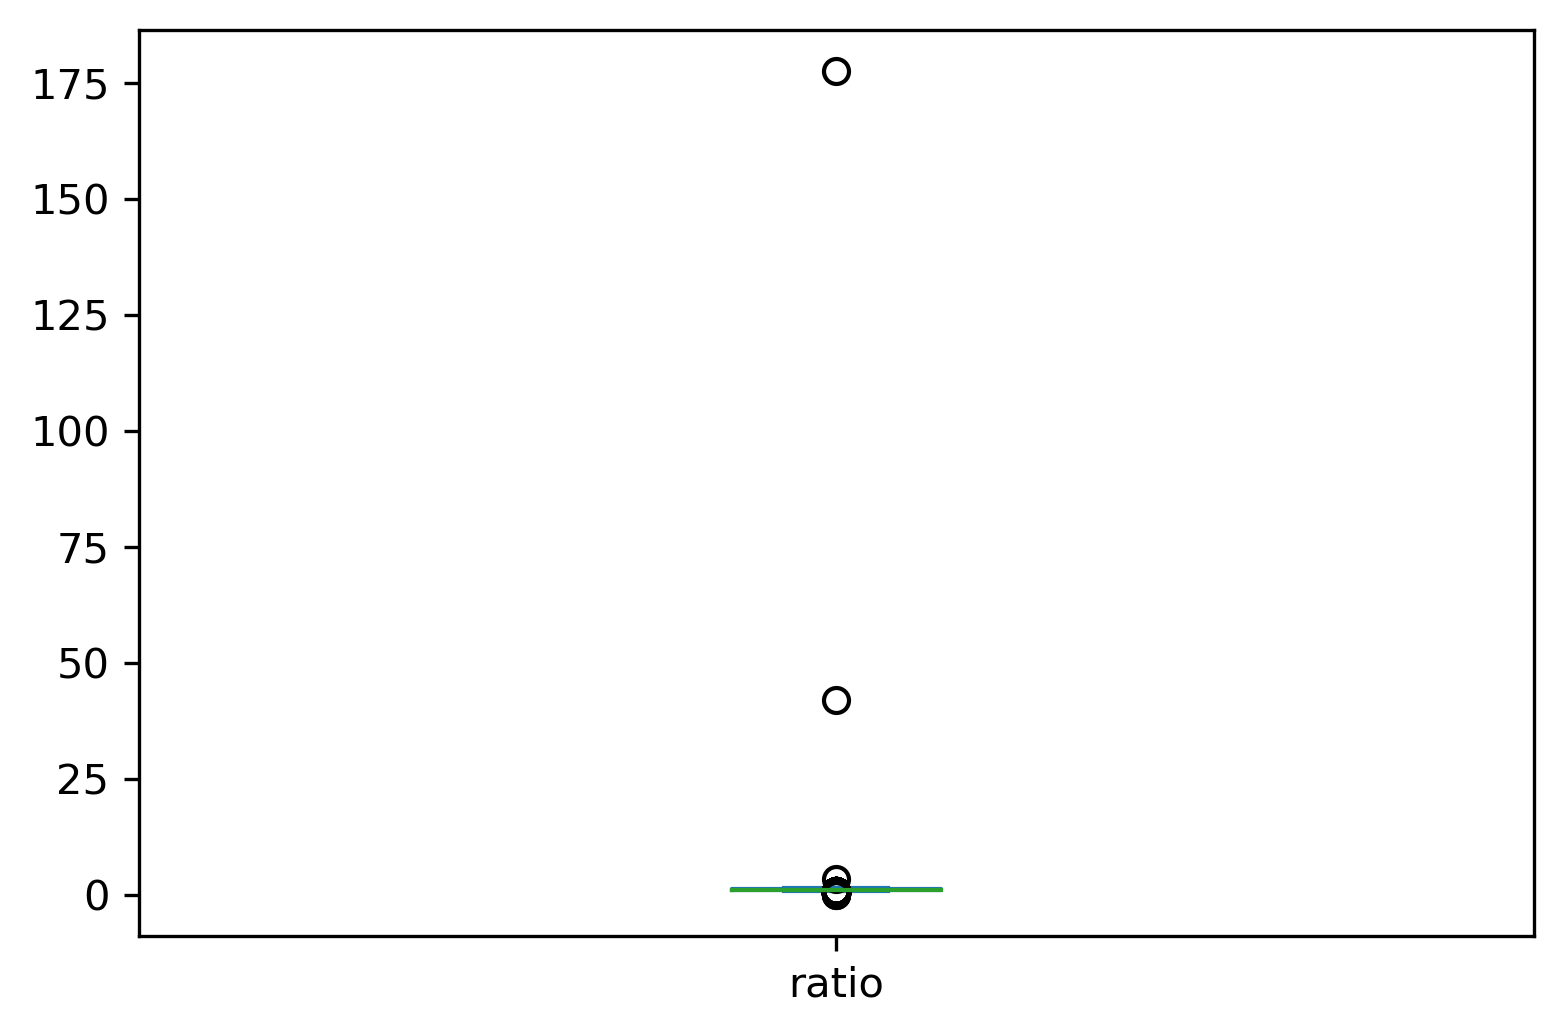

In [65]:
df_merged.ratio.plot.box()

As a percentage, most dogs got a score between 100% - 120%. However, there are dogs which have got very high score, i.e., higher than 1500%. It is interesting to investigate the reason behind these outliers.

In [66]:
df_merged[df_merged['ratio'] > 15]['text'].values

array(["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
       'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'],
      dtype=object)

Nothing is wrong with data extraction. The reason behind these outliers is simply that they liked the dogs so much.

### Exploratory Data Analysis (EDA)

#### Research Question 1 (How does dog rating affect retweet and favorite counts?)

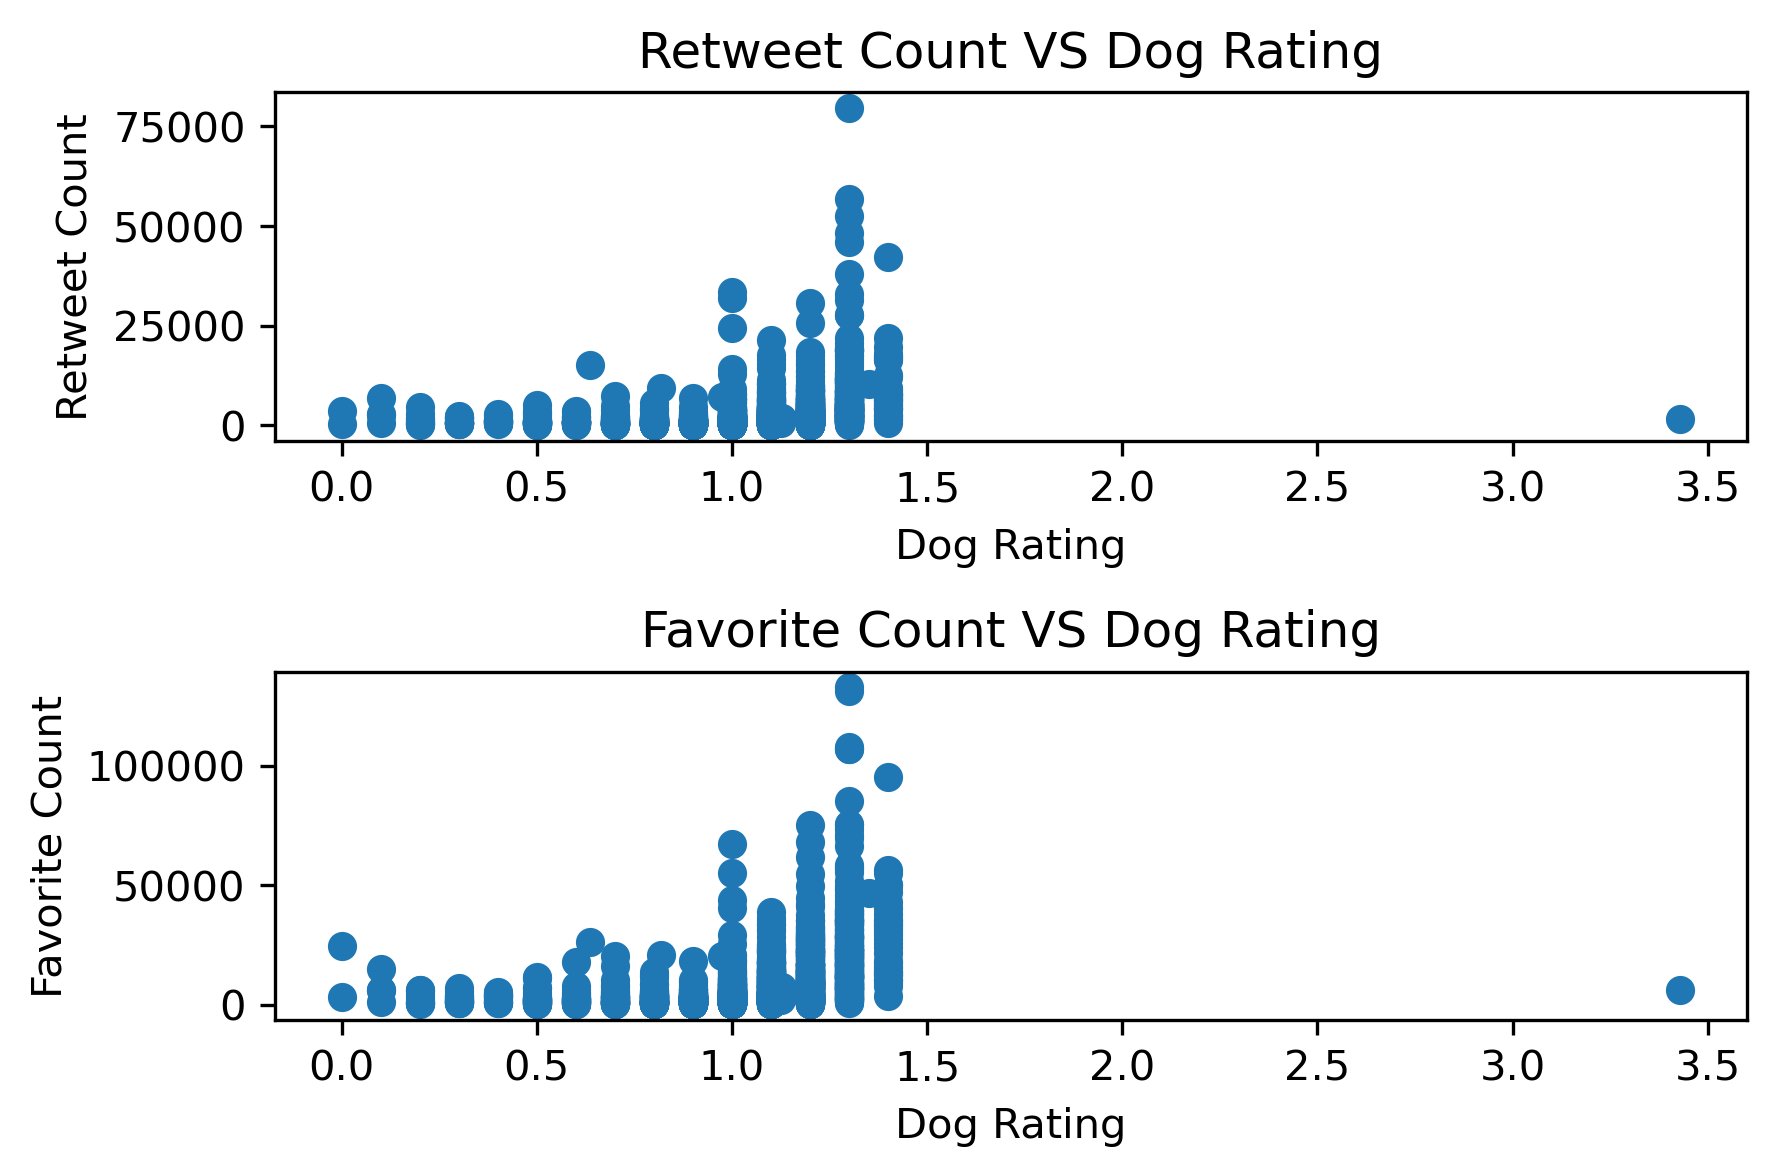

In [67]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('Retweet Count VS Dog Rating')
ax2.set_title('Favorite Count VS Dog Rating')

ax1.scatter(df_merged[df_merged['ratio'] < 15]['ratio'], df_merged[df_merged['ratio'] < 15]['retweet_count'])
ax1.set(xlabel='Dog Rating', ylabel='Retweet Count')

ax2.scatter(df_merged[df_merged['ratio'] < 15]['ratio'], df_merged[df_merged['ratio'] < 15]['favorite_count'])
ax2.set(xlabel='Dog Rating', ylabel='Favorite Count')

fig.tight_layout(pad=1.0)
plt.savefig('Favorite_Count_&_Retweet_Count_VS_Dog_Rating.png')

Clearly, it can be seen that tweets of dogs with higher ratings tend to have more likes and retweets.

#### Research Question 2 (Is there a correlation between retweet count and favorite count?)

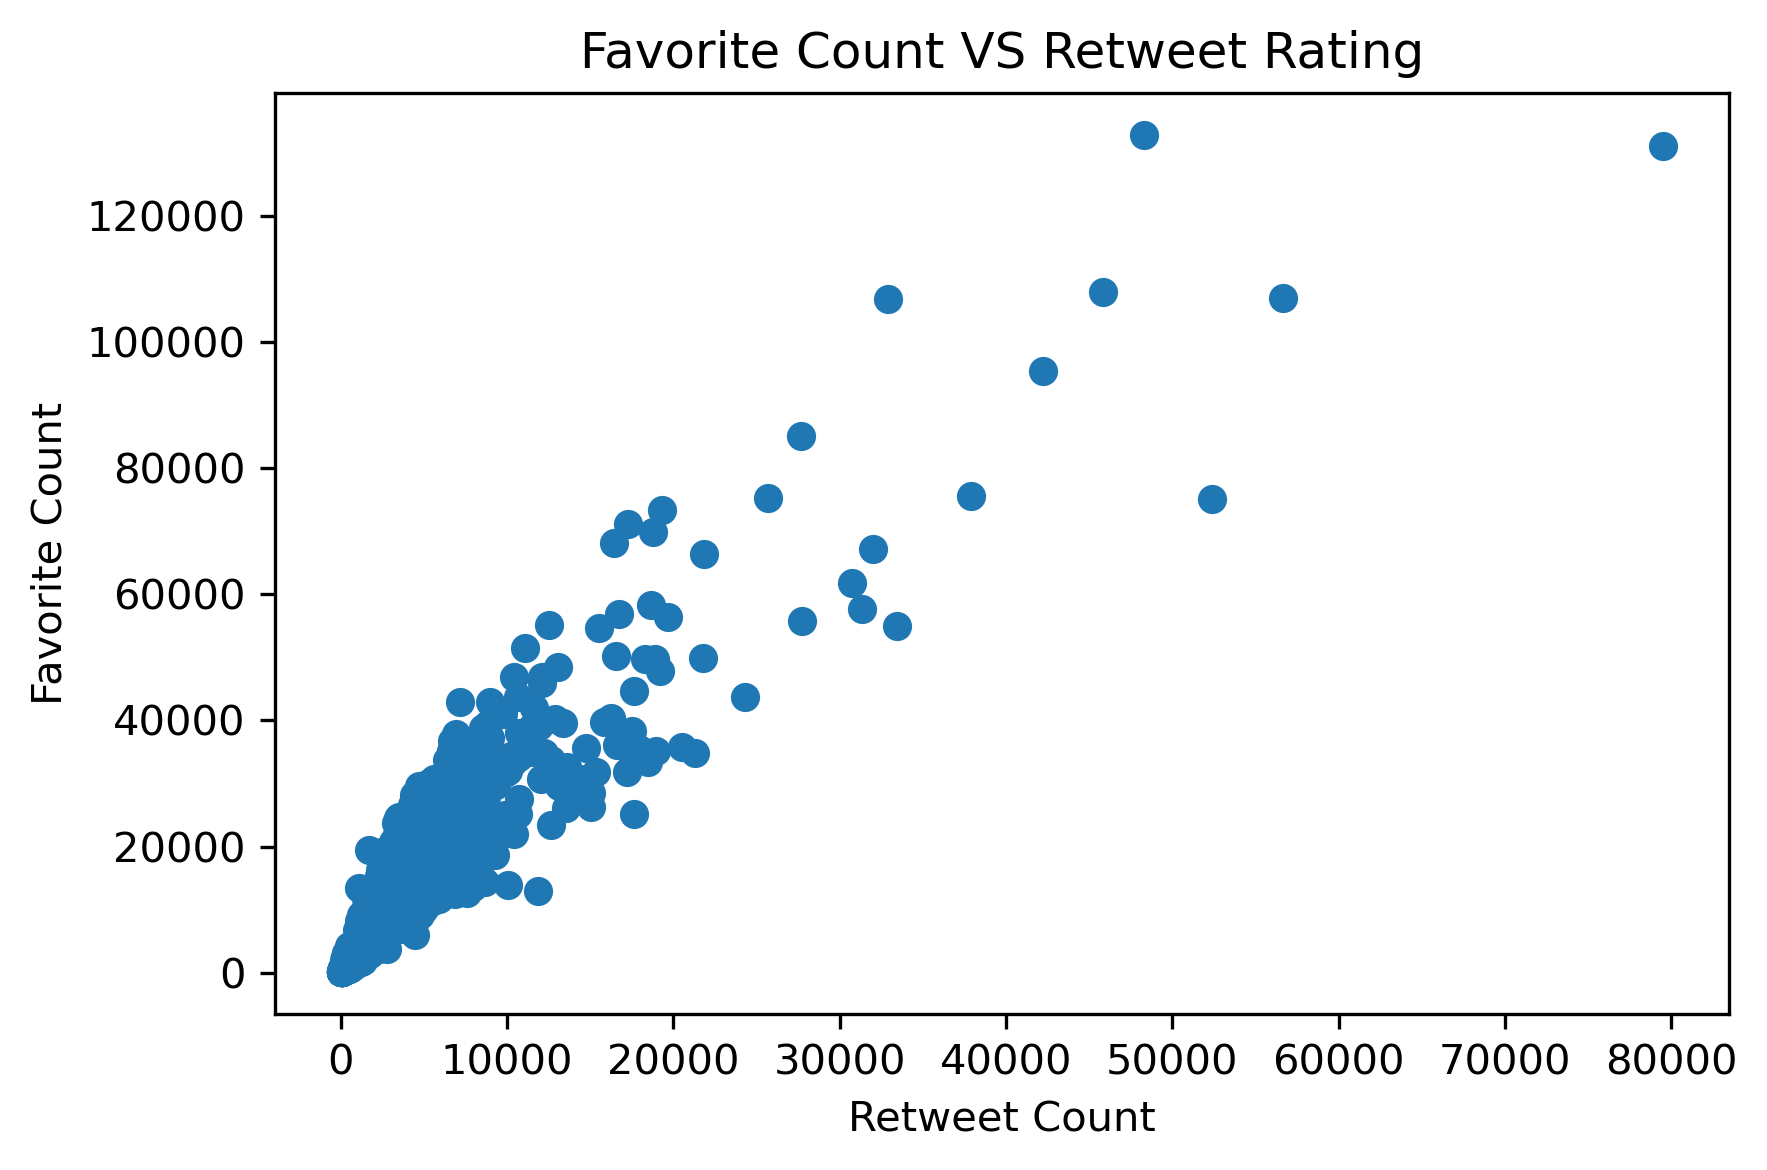

In [68]:
plt.scatter(df_merged['retweet_count'], df_merged['favorite_count'])
plt.title('Favorite Count VS Retweet Rating')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.tight_layout()
plt.savefig('Favorite_Count_VS_Retweet_Count.png')
plt.show()

It is obvious from the plot that there is a positive correlation between retweet count and favorite count.

#### Research Question 3 (Which tweet source is more common?)

In [69]:
#One hot encoding for the 'source' column
Encoded_Df = df_merged["source"].str.get_dummies()
Encoded_Df.head(5)

,TweetDeck,Twitter Web Client,Twitter for iPhone
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [70]:
#Count the frequency of each category and sorting the results
df_freq = Encoded_Df.sum().sort_values(0).loc[::-1].reset_index()
df_freq.set_axis(['Source', 'Frequency'], axis='columns', inplace=True)
df_freq

,Source,Frequency
0,Twitter for iPhone,1954
1,Twitter Web Client,28
2,TweetDeck,11


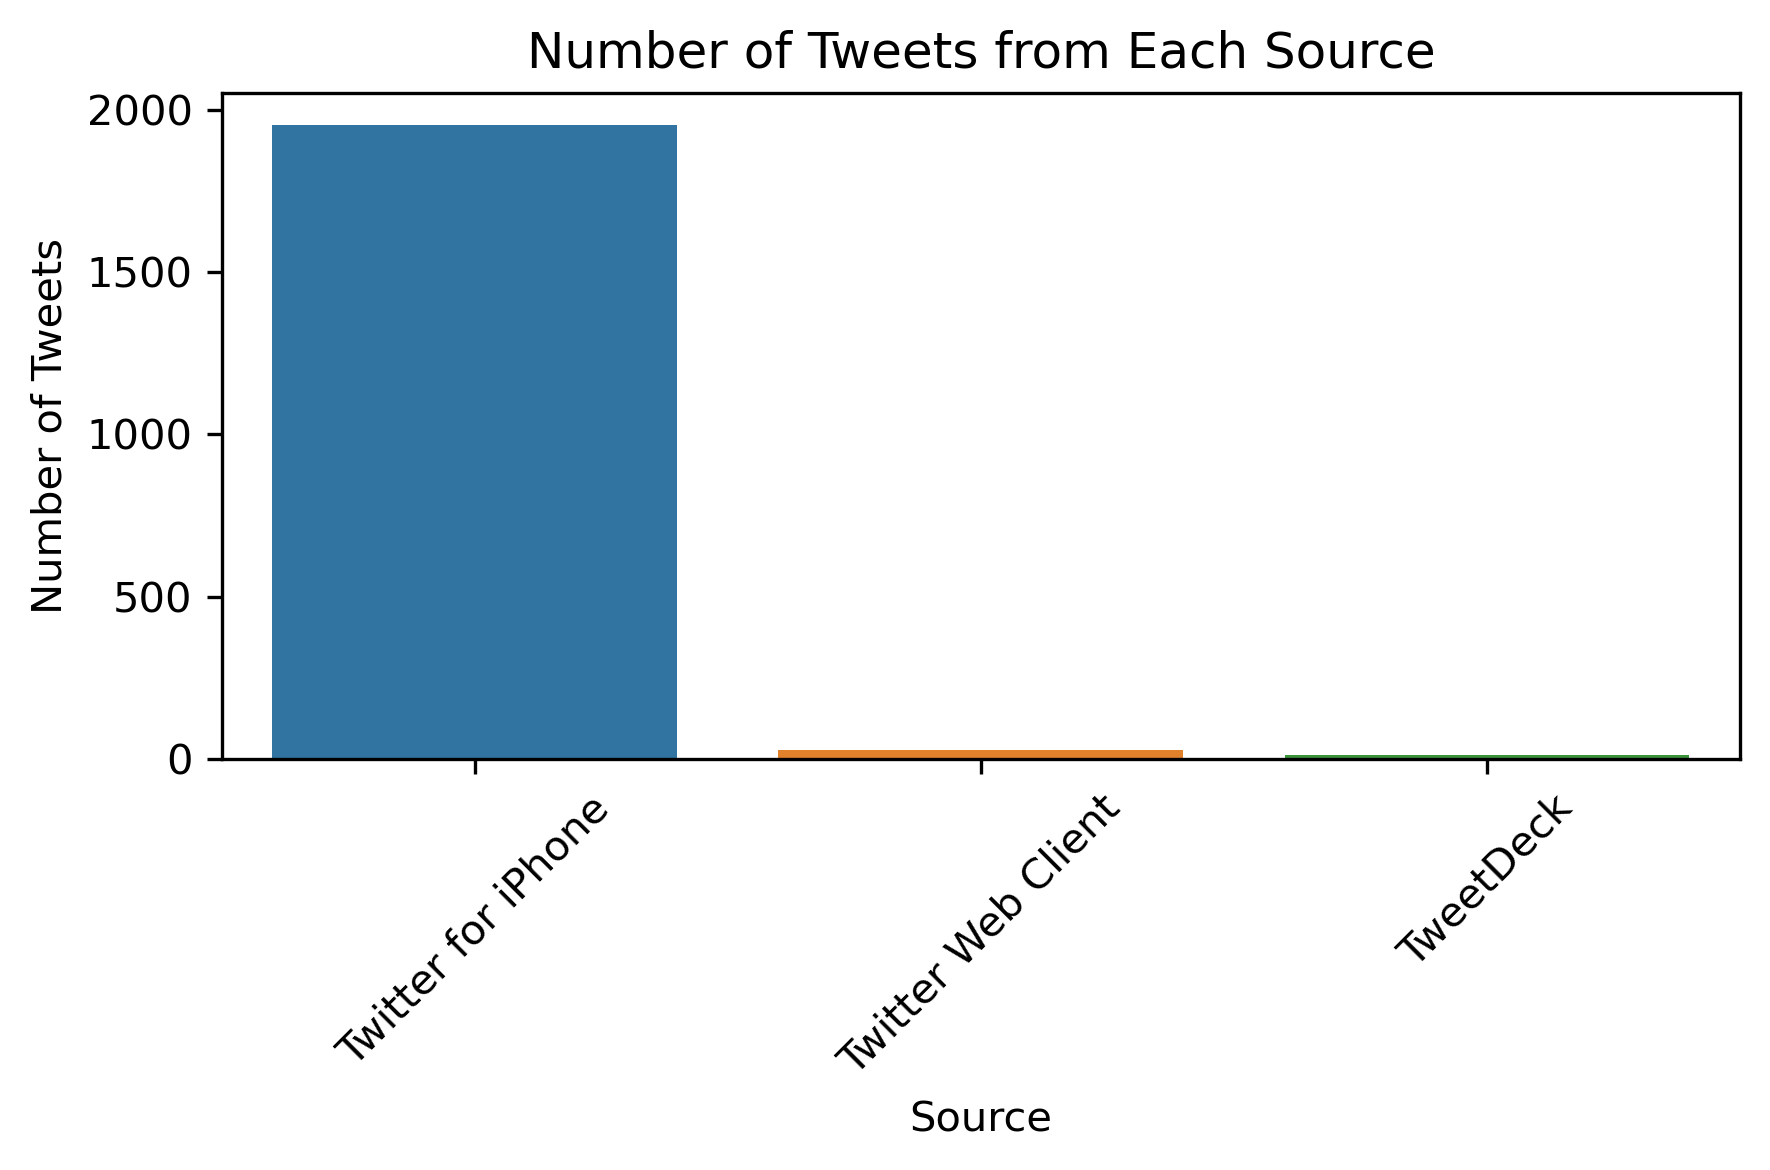

In [71]:
# Plot the findings using a bar chart
sns.barplot(x='Source', y='Frequency',data=df_freq)
plt.xticks(rotation=45)
plt.title("Number of Tweets from Each Source")
plt.xlabel('Source')
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.savefig('Source_VS_Number_of_Tweets.png')
plt.show()

It is found that 'Twitter for iPhone' is the most common source for tweets.

#### Research Question 4 (Which dog stage is more common?)

In [72]:
#One hot encoding for the 'dog_stage' column
Encoded_Df_Stage = df_merged["dog_stage"].str.get_dummies()
Encoded_Df_Stage.head(5)

,None,doggo,"doggo, floffer","doggo, pupper","doggo, puppo",floofer,pupper,puppo
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [73]:
#Count the frequency of each category and sort the results
df_freq_stage = Encoded_Df_Stage.sum().sort_values(0).loc[::-1].reset_index()
df_freq_stage.set_axis(['Stage', 'Frequency'], axis='columns', inplace=True)
df_freq_stage

,Stage,Frequency
0,None,1687
1,pupper,203
2,doggo,63
3,puppo,22
4,"doggo, pupper",9
5,floofer,7
6,"doggo, puppo",1
7,"doggo, floffer",1


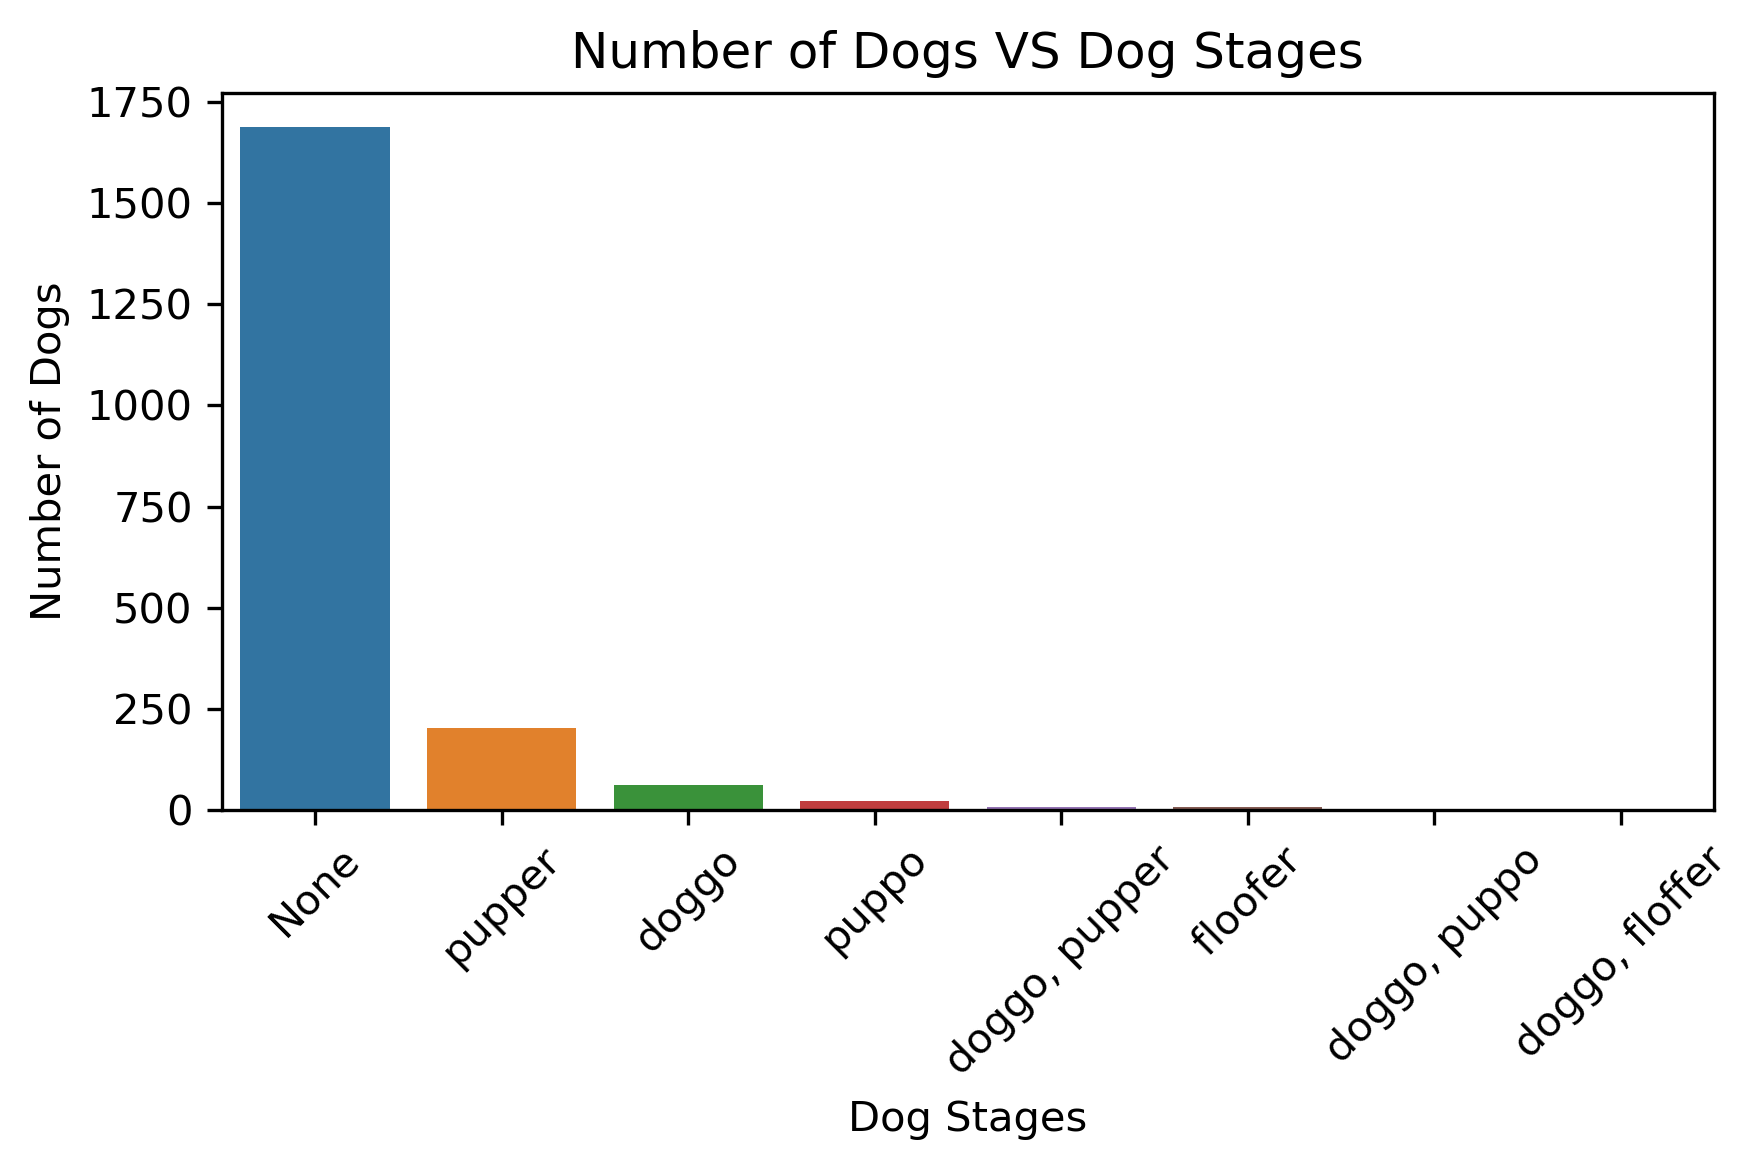

In [74]:
# Plot the findings using a bar chart
sns.barplot(x='Stage', y='Frequency',data=df_freq_stage)
plt.xticks(rotation=45)
plt.title("Number of Dogs VS Dog Stages")
plt.xlabel('Dog Stages')
plt.ylabel("Number of Dogs")
plt.tight_layout()
plt.savefig('Number_of_Dogs_VS_Dog_Stages.png')
plt.show()

The most popular stage in the dogs is 'pupper'.

### Insights:
1. There is a positive correlation between dog rating and number of retweets and favorites.

2. There is a positive correlation between retweet count and favorite count.

3. The most common source for tweets is 'Twitter for iPhone'.

4. The most common stage is 'pupper'.